### Assignment 8 : Data Analytics 1

#### Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("boston_housing.csv");
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Data Preprocessing

In [4]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

#### Column Information :
#### crim : Crime rate per capita
#### zn : Proportion of zoned land for lots over 250000 sq. ft
#### indus : Proportion of non retailed owned business in acre / town
#### chas : Charles river flowing or no
#### nox : Concentration of nitric oxide
#### rm : Average no of rooms / dweeling
#### age : Proportion of owner occupied business built prior to 1940
#### dis : Weighted distance to five Boston employability centers
#### rad : index of accessibilty to radial highways
#### tax : tax collection %
#### b : Proportion of black african americans
#### lstat : lower status population %
#### medv : Median value of owner occupied houses in $1000s

In [5]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

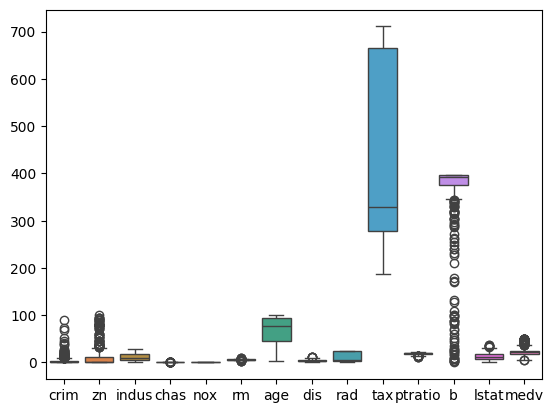

In [6]:
sns.boxplot(data = df)

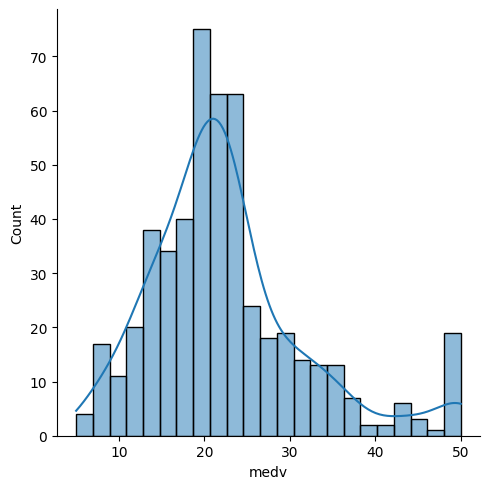

In [7]:
sns.displot(data = df.medv,kde = True)

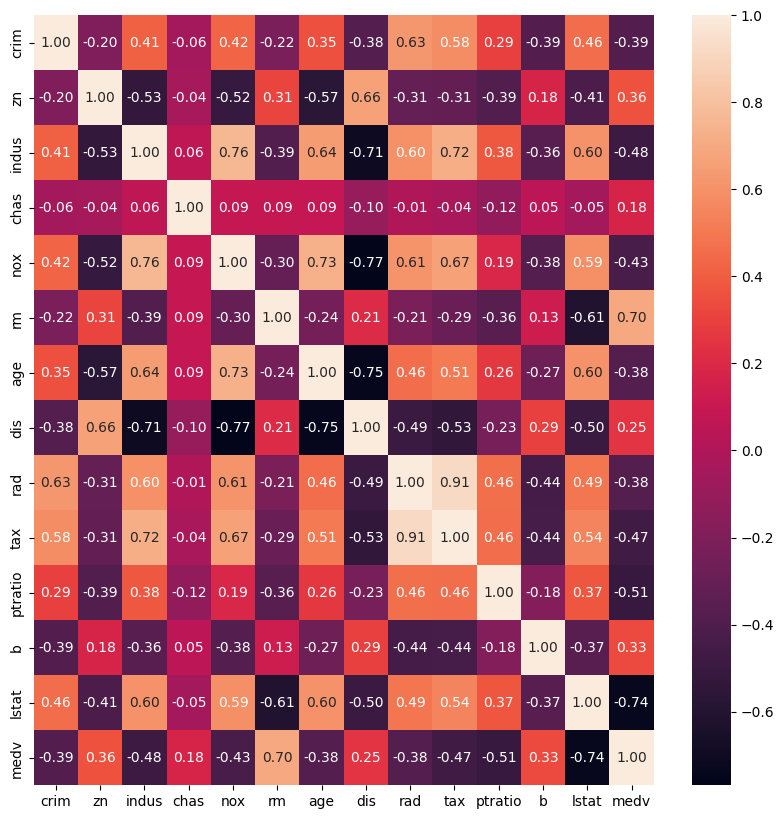

In [8]:
plt.figure(figsize = (10,10))
sns.heatmap(data = df.corr(), annot = True, fmt = ".2f")
plt.show()

####  Predict the value of prices of the house using the given features.

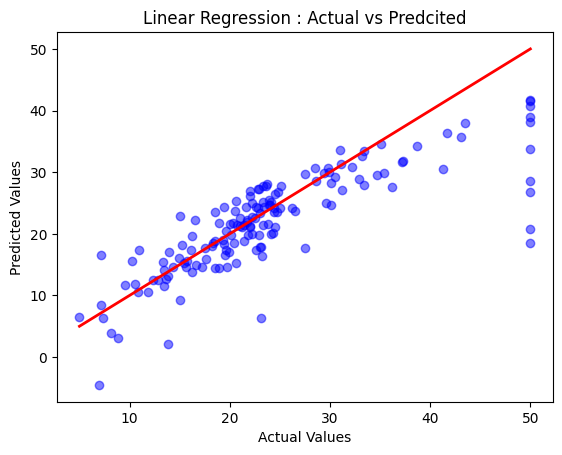

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = np.asarray(df.drop(["medv"], axis = 1))
y = np.asarray(df["medv"])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

model = LinearRegression()

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test,y_pred,color='blue', alpha=0.5)

plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], color = "red",lw = 2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression : Actual vs Predcited")
plt.show()

In [10]:
print(model.coef_)

[-1.02040736  0.55724977  0.00643053  0.27096489 -1.86879071  3.14228857
 -0.6174673  -2.82214004  2.40266411 -2.22310749 -2.2474974   1.05850703
 -2.4650586 ]


In [11]:
print(model.intercept_)

21.97090395480227


In [12]:
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score", r2_score(y_test,y_pred))

Mean Squared Error 6.20399822466953
R2 Score 0.6293672961762802
